In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.options.display.float_format = '{:.4f}'.format

In [6]:
prev_app = pd.read_csv('previous_application.csv')
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.4300,17145.0000,17145.0000,0.0000,17145.0000,SATURDAY,15,Y,1,0.0000,0.1828,0.8673,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0000,middle,POS mobile with interest,365243.0000,-42.0000,300.0000,-42.0000,-37.0000,0.0000
1,2802425,108129,Cash loans,25188.6150,607500.0000,679671.0000,NaN,607500.0000,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0000,low_action,Cash X-Sell: low,365243.0000,-134.0000,916.0000,365243.0000,365243.0000,1.0000
2,2523466,122040,Cash loans,15060.7350,112500.0000,136444.5000,NaN,112500.0000,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0000,high,Cash X-Sell: high,365243.0000,-271.0000,59.0000,365243.0000,365243.0000,1.0000
3,2819243,176158,Cash loans,47041.3350,450000.0000,470790.0000,NaN,450000.0000,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0000,middle,Cash X-Sell: middle,365243.0000,-482.0000,-152.0000,-182.0000,-177.0000,1.0000
4,1784265,202054,Cash loans,31924.3950,337500.0000,404055.0000,NaN,337500.0000,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0000,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
null_count=prev_app.isnull().sum().reset_index().rename(columns={'index':'col',0:'msng'})
null_count

,col,msng
0,SK_ID_PREV,0
1,SK_ID_CURR,0
2,NAME_CONTRACT_TYPE,0
3,AMT_ANNUITY,372235
4,AMT_APPLICATION,0
5,AMT_CREDIT,1
6,AMT_DOWN_PAYMENT,895844
7,AMT_GOODS_PRICE,385515
8,WEEKDAY_APPR_PROCESS_START,0
9,HOUR_APPR_PROCESS_START,0


# removing missing values 

In [20]:
null_count['msng_pct']=null_count['msng']/prev_app.shape[0]*100
null_count=null_count.sort_values(by='msng_pct',ascending=False)

In [22]:
null_count.head()

,col,msng,msng_pct
14,RATE_INTEREST_PRIVILEGED,1664263,99.6437
13,RATE_INTEREST_PRIMARY,1664263,99.6437
6,AMT_DOWN_PAYMENT,895844,53.6365
12,RATE_DOWN_PAYMENT,895844,53.6365
20,NAME_TYPE_SUITE,820405,49.1198


In [33]:
var_msng_40=list(null_count[null_count['msng_pct']>40]['col'])
var_msng_40

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'NAME_TYPE_SUITE',
 'NFLAG_INSURED_ON_APPROVAL',
 'DAYS_TERMINATION',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_FIRST_DUE',
 'DAYS_FIRST_DRAWING']

In [45]:
# dropping this columns having more than 40 % missing values + some irrevalnt colimns


nva_cols = var_msng_40+['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
print(len(nva_cols))

prev_app_nva_col_rmvd=prev_app.drop(labels=nva_cols,axis=1)

prev_app_nva_col_rmvd.shape

15


(1670214, 22)

In [47]:
# remaining missing values 

prev_app_nva_col_rmvd.isnull().sum().sort_values(ascending=False)/prev_app_nva_col_rmvd.shape[0]*100


AMT_GOODS_PRICE          23.0818
AMT_ANNUITY              22.2867
CNT_PAYMENT              22.2864
PRODUCT_COMBINATION       0.0207
AMT_CREDIT                0.0001
NAME_GOODS_CATEGORY       0.0000
NAME_YIELD_GROUP          0.0000
NAME_SELLER_INDUSTRY      0.0000
SELLERPLACE_AREA          0.0000
CHANNEL_TYPE              0.0000
NAME_PRODUCT_TYPE         0.0000
NAME_PORTFOLIO            0.0000
SK_ID_PREV                0.0000
NAME_CLIENT_TYPE          0.0000
SK_ID_CURR                0.0000
NAME_PAYMENT_TYPE         0.0000
DAYS_DECISION             0.0000
NAME_CONTRACT_STATUS      0.0000
NAME_CASH_LOAN_PURPOSE    0.0000
AMT_APPLICATION           0.0000
NAME_CONTRACT_TYPE        0.0000
CODE_REJECT_REASON        0.0000
dtype: float64

In [50]:
# lets start analysising remaing columns

prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].describe() # this column data seems skewed casuse 

count   1284699.0000
mean     227847.2793
std      315396.5579
min           0.0000
25%       50841.0000
50%      112320.0000
75%      234000.0000
max     6905160.0000
Name: AMT_GOODS_PRICE, dtype: float64

kewness: Skewness measures the asymmetry of the distribution. A positive skewness indicates that the right tail of the distribution is longer or stretched out compared to the left tail. In this case, the mean (227,847.28) is greater than the median (112,320), suggesting a potential right-skewed distribution where the tail extends towards higher values. This skewness could be caused by relatively few extremely high values.

Outliers: Outliers are data points that significantly differ from other observations in the dataset. The presence of a large maximum value (6,905,160) compared to the 75th percentile (234,000) suggests the existence of potential outliers on the higher end of the distribution. Similarly, the minimum value of 0 might indicate the presence of outliers or erroneous data points on the lower end.

# so for sure outlier is there , but now which statistical average to fill the missing values ? lets compare all.

okay lets fill with every average and compare using kde plot

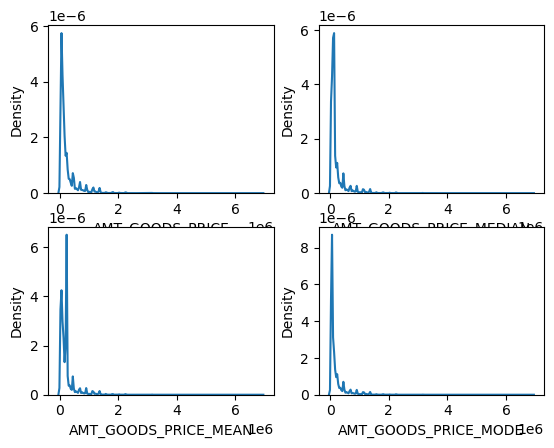

In [61]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE_MEDIAN']=prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].median())

prev_app_nva_col_rmvd['AMT_GOODS_PRICE_MODE'] = prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].mode()[0])


prev_app_nva_col_rmvd['AMT_GOODS_PRICE_MEAN'] = prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].mean())



gp_cols = ['AMT_GOODS_PRICE','AMT_GOODS_PRICE_MEDIAN','AMT_GOODS_PRICE_MEAN','AMT_GOODS_PRICE_MODE']

for i,col in enumerate(gp_cols):
    
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=prev_app_nva_col_rmvd,x=col)
    plt.subplot_adjust(hspace=.5) 

 now the graph which is most similar to original graph is considered and that statistical average is used to do fill missing values.
in our case it is median

In [96]:

prev_app_nva_col_rmvd['AMT_GOODS_PRICE'] = prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].median())


In [97]:
prev_app_nva_col_rmvd.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.4300,17145.0000,17145.0000,17145.0000,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0000,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.6150,607500.0000,679671.0000,607500.0000,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0000,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.7350,112500.0000,136444.5000,112500.0000,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0000,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.3350,450000.0000,470790.0000,450000.0000,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0000,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.3950,337500.0000,404055.0000,337500.0000,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0000,high,Cash Street: high


In [ ]:
# doing similar things with AMT_ANNUITY  column and PRODUCT_COMBINATION'
# replacing using median.


In [63]:

prev_app_nva_col_rmvd['AMT_ANNUITY'].agg(func=['mean','median','max'])


mean      15955.1207
median    11250.0000
max      418058.1450
Name: AMT_ANNUITY, dtype: float64

In [64]:

prev_app_nva_col_rmvd['AMT_ANNUITY'] = prev_app_nva_col_rmvd['AMT_ANNUITY'].fillna(prev_app_nva_col_rmvd['AMT_ANNUITY'].median())


In [66]:

prev_app_nva_col_rmvd['PRODUCT_COMBINATION'] = prev_app_nva_col_rmvd['PRODUCT_COMBINATION'].fillna(prev_app_nva_col_rmvd['PRODUCT_COMBINATION'].mode()[0])


In [98]:
# 'CNT_PAYMENT column. basically number of months the loan was given for . lets group and se the possible combinations.


prev_app_nva_col_rmvd['CNT_PAYMENT'].agg(func=['mean','median','max'])



mean     12.4762
median   10.0000
max      84.0000
Name: CNT_PAYMENT, dtype: float64

In [88]:
# lets do some feature engineering on the CNT_PAYMENT. 

prev_app_nva_col_rmvd[prev_app_nva_col_rmvd['CNT_PAYMENT'].isnull()].groupby('NAME_CONTRACT_STATUS').size()



NAME_CONTRACT_STATUS
Approved             4
Canceled        305805
Refused          40897
Unused offer     25524
dtype: int64

we see here that , if we fill the CNT_PAYMENT with say  any central tendancy it can have significant effect on the cancelled section cause most of the application in this null section are cancelled. so without taking risk , lets replace it with 0

In [90]:

prev_app_nva_col_rmvd['CNT_PAYMENT'] = prev_app_nva_col_rmvd['CNT_PAYMENT'].fillna(0)


dropping the columns created to compare that is , AMT_GOODS_PRICE_MEDIAN','AMT_GOODS_PRICE_MEAN','AMT_GOODS_PRICE_MODE

# merging the data from app and prev_app